In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

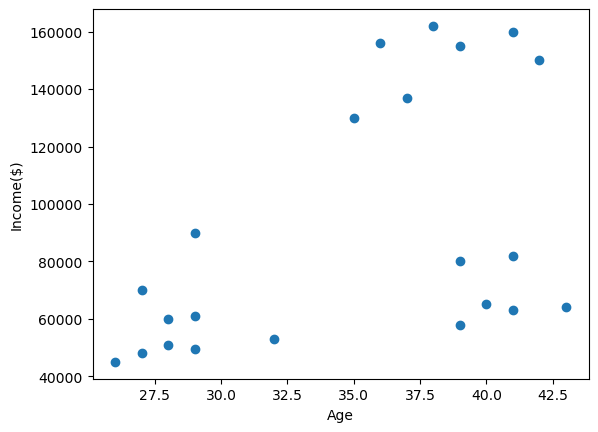

In [3]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

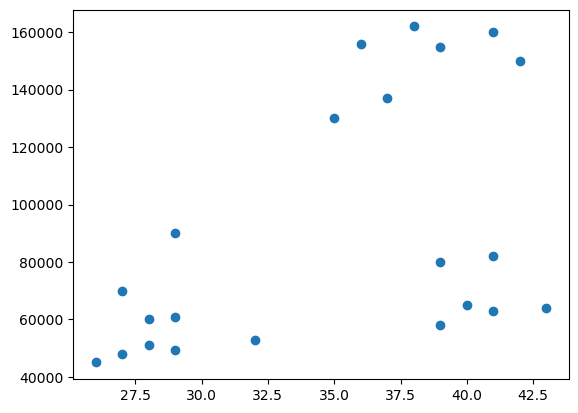

In [4]:
plt.scatter(x=df['Age'],y=df['Income($)'])

In [5]:
df.rename(columns={'Income($)':'income'},inplace=True)

#### Renaming Income($) as income

In [6]:
df.head()

,Name,Age,income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


## Create a Model Object

In [7]:
km=KMeans(n_clusters=3) #number of clusters k=3
# here k is determined by looking the plot, as there is only 2 variables.
# otherwise we use elbow method to find the number of cluster,k.

In [8]:
km.fit(X=df[['Age','income']])

KMeans(n_clusters=3)

In [9]:
y_predicted = km.predict(df[['Age','income']])

In [10]:
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [11]:
df['predicted_cluster'] = y_predicted

In [12]:
df

,Name,Age,income,predicted_cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


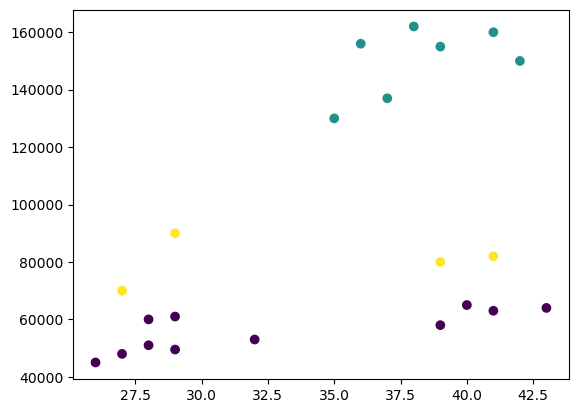

In [13]:
plt.scatter(x = df['Age'], y=df['income'], c=df['predicted_cluster'], cmap='viridis')

In [14]:
km.cluster_centers_   # center of gravity

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

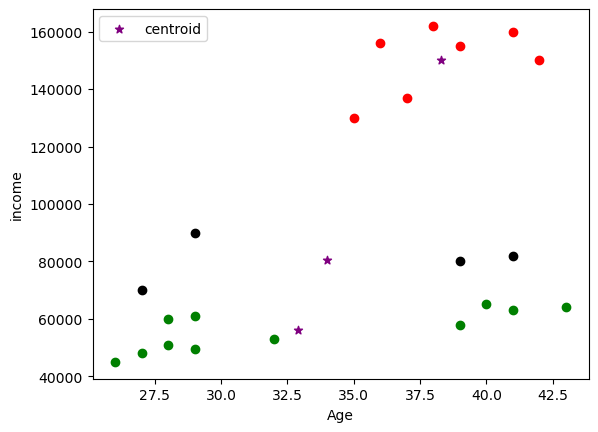

In [15]:
df1=df[df.predicted_cluster==0]
df2=df[df.predicted_cluster==1]
df3=df[df.predicted_cluster==2]
plt.scatter(df1.Age,df1['income'],color='green')
plt.scatter(df2.Age,df2['income'],color='red')
plt.scatter(df3.Age,df3['income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('income')
plt.legend()

### We are not getting correct answer because they are not scaled values.

## Scaling the values to get better predictions

In [16]:
df_copy=df.copy()

In [17]:
#initialise object for income
income_scaler = MinMaxScaler()

In [18]:
#fit the data
income_scaler.fit(df_copy[['income']])

MinMaxScaler()

In [19]:
# Transform the data
df_copy['income'] = income_scaler.transform(df_copy[['income']])

In [20]:
#initialise object for Age
age_scaler=MinMaxScaler()
#fit the data
age_scaler.fit(df_copy[['Age']])
# Transform the data
df_copy['Age'] = age_scaler.transform(df_copy[['Age']])

In [21]:
df_copy.head()

,Name,Age,income,predicted_cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


#### df_copy is scaled now

#### MinMaxScaler (X-Xmin)/(Xmax-Xmin)

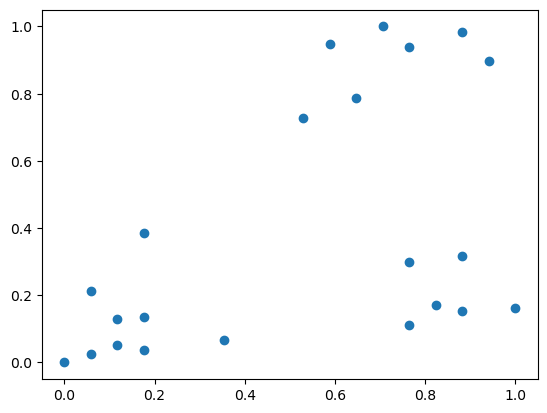

In [22]:
plt.scatter(df_copy.Age,df_copy['income'])

In [23]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_copy[['Age','income']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [24]:
df_copy['cluster']=y_predicted
df_copy.head()

,Name,Age,income,predicted_cluster,cluster
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,0


In [25]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

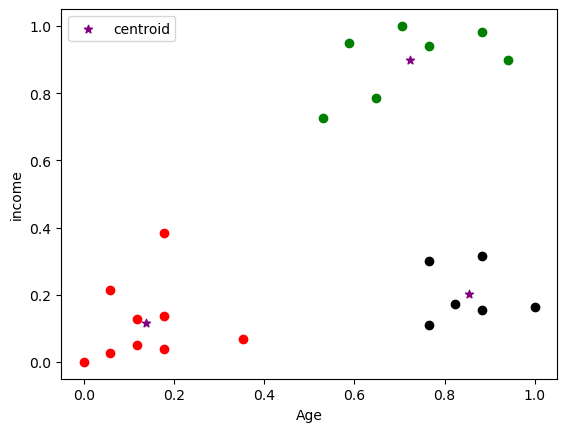

In [26]:
df1=df_copy[df_copy.cluster==0]
df2=df_copy[df_copy.cluster==1]
df3=df_copy[df_copy.cluster==2]
plt.scatter(df1.Age,df1['income'],color='green')
plt.scatter(df2.Age,df2['income'],color='red')
plt.scatter(df3.Age,df3['income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('income')
plt.legend()

# Elbow Plot

##### we will start with k=3. Create Model Object then Fit and then predict

In [27]:
km.inertia_

0.4750783498553096

In [28]:
km.inertia_.__doc__

'Convert a string or number to a floating point number, if possible.'

##### sum of squared errors of each clusters is the km.inertia_

In [29]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','income']])
    sse.append(km.inertia_)

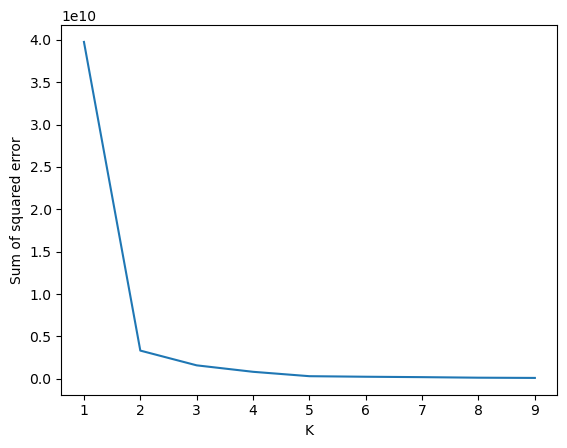

In [30]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### From the plot its clear that k is take as 2. Rest we can do as we got k's value.

In [31]:
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(df_copy[['Age','income']])

In [32]:
df_copy['2clusters']=y_predicted

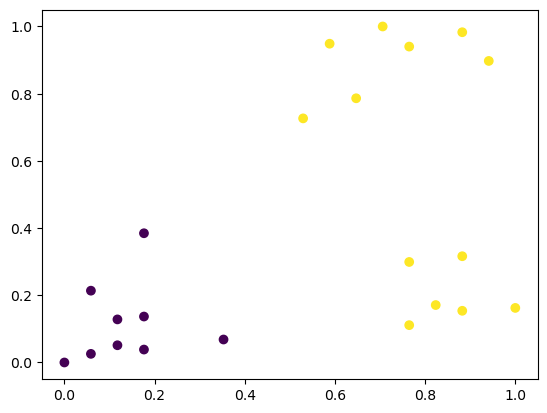

In [33]:
plt.scatter(x=df_copy['Age'],y=df_copy['income'],c=df_copy['2clusters'],cmap='viridis')

##### we cannot find the accuracy or test and train on the real values as there is no target columns. This is the way classsification is done by KMeans.